In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')


In [2]:
xtrain = pd.read_csv("Diabetes_XTrain.csv")
ytrain = pd.read_csv("Diabetes_YTrain.csv")
xtest = pd.read_csv("Diabetes_Xtest.csv")


In [3]:
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
xtest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [5]:
ytrain.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [6]:
xtrain.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [7]:
xtrain.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

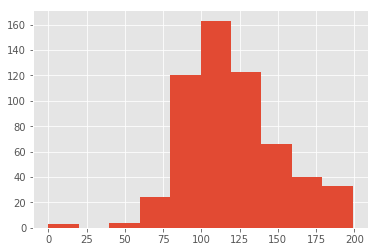

In [8]:
xtrain['Glucose'].hist()

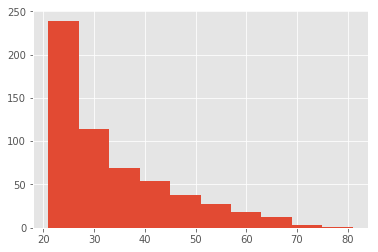

In [9]:
xtrain['Age'].hist()

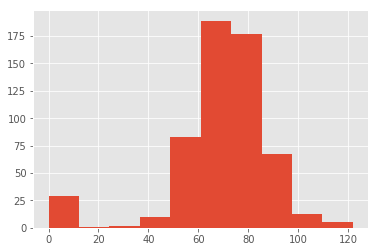

In [10]:
xtrain['BloodPressure'].hist()

In [11]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x_train = mm_scaler.fit_transform(xtrain)
mm_scaler.transform(xtest)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.        , 0.90452261, 0.73770492, ..., 0.54396423, 0.10076857,
        0.23333333],
       [0.11764706, 0.46733668, 0.52459016, ..., 0.56631893, 0.25448335,
        0.03333333],
       [0.11764706, 0.57286432, 0.55737705, ..., 0.42771982, 0.0059778 ,
        0.06666667],
       ...,
       [0.        , 0.81407035, 0.62295082, ..., 0.73919523, 0.12211785,
        0.08333333],
       [0.70588235, 0.42211055, 0.59016393, ..., 0.44262295, 0.09350982,
        0.41666667],
       [0.        , 0.47236181, 0.        , ..., 0.        , 0.07600342,
        0.06666667]])

In [12]:
x_train.shape

(576, 8)

In [13]:
dataset = pd.DataFrame({'Pregnancies':x_train[:,0],'Glucose':x_train[:,1],'BloodPressure':x_train[:,2],'SkinThickness':x_train[:,3],'Insulin':x_train[:,4],'BMI':x_train[:,5],'DiabetesPedigreeFunction':x_train[:,6],'Age':x_train[:,7]})
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.844221,0.721311,0.666667,0.431452,0.569300,0.302733,0.316667
1,0.470588,0.552764,0.622951,0.000000,0.000000,0.414307,0.067891,0.616667
2,0.411765,0.738693,0.622951,0.000000,0.000000,0.587183,0.076430,0.366667
3,0.117647,0.502513,0.540984,0.317460,0.120968,0.490313,0.336892,0.116667
4,0.235294,0.648241,0.704918,0.317460,0.362903,0.523100,0.065329,0.033333


In [14]:
df = dataset.join(ytrain)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.844221,0.721311,0.666667,0.431452,0.569300,0.302733,0.316667,1
1,0.470588,0.552764,0.622951,0.000000,0.000000,0.414307,0.067891,0.616667,0
2,0.411765,0.738693,0.622951,0.000000,0.000000,0.587183,0.076430,0.366667,1
3,0.117647,0.502513,0.540984,0.317460,0.120968,0.490313,0.336892,0.116667,1
4,0.235294,0.648241,0.704918,0.317460,0.362903,0.523100,0.065329,0.033333,0


In [16]:
# Check For the Correlation
corr=df.corr()["Outcome"]
corr[np.argsort(corr, axis=0)[::-1]]

Outcome                     1.000000
Glucose                     0.473483
BMI                         0.311717
Pregnancies                 0.213015
Age                         0.204733
DiabetesPedigreeFunction    0.179672
Insulin                     0.141941
BloodPressure               0.072045
SkinThickness               0.067829
Name: Outcome, dtype: float64

In [17]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [18]:
targetfet = y

features = x
print(targetfet.shape,'\n')
print(features.shape)

(576,) 

(576, 8)


In [30]:
####Prediction model########
#Train-Test split
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(features, targetfet, test_size = 0.333, random_state = 42)

print(data_train.shape,'\n')
print(data_test.shape,'\n')
print(label_train.shape,'\n')
print(label_test.shape,'\n')

(384, 8) 

(192, 8) 

(384,) 

(192,) 



In [31]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)


Training score:  0.7630208333333334
Testing score:  0.7447916666666666


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
## Checking the Accuracy 

#Prediction using test data
label_pred = logis.predict(data_test)
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(label_test, label_pred))
# evaluate predictions
accuracy = metrics.accuracy_score(label_test, label_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.7447916666666666
Accuracy: 74.48%


In [33]:
label_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [34]:
# df = pd.DataFrame({"Id":[i for i in range(label_pred.shape[0])],"Outcome":label_pred}, index=None)
# df = df.drop('Id',axis=1)
# df.to_csv('submission.csv', index=None)

In [35]:
# np.save will lead to floating point numbers
#np.savetxt('Predicted Solution.csv',label_pred)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
# knn_clf=KNeighborsClassifier(n_neighbors=10)
# knn_clf.fit(data_train,label_train)
# label_pred_knn = knn_clf.predict(data_test)
# accuracy_knn=knn_clf.score(label_test,label_pred_knn)
# print(accuracy_knn)

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, data_train, label_train, cv=3)
knn_mean = knn_scores.mean()
print(knn_mean)

0.6770302422226292


In [37]:
knn_clf.fit(data_train, label_train)
#Prediction using test data
label_pred_knn = knn_clf.predict(data_test)
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(label_test, label_pred_knn))
# evaluate predictions
accuracy = metrics.accuracy_score(label_test, label_pred_knn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.703125
Accuracy: 70.31%


In [38]:
# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, data_train, label_train, cv=2)
log_reg_mean = log_scores.mean()
print(log_reg_mean)

0.7213541666666666


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
df = pd.DataFrame({"Id":[i for i in range(label_pred.shape[0])],"Outcome":label_pred}, index=None)
df = df.drop('Id',axis=1)
df.to_csv('submission1.csv', index=None)

In [40]:
log_reg.fit(data_train, label_train)
#Prediction using test data
label_pred_lr = log_reg.predict(data_test)
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(label_test, label_pred_lr))
# evaluate predictions
accuracy = metrics.accuracy_score(label_test, label_pred_lr)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.7447916666666666
Accuracy: 74.48%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
